In [19]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from silence_tensorflow import silence_tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing 

# silence_tensorflow()

In [20]:



def load_images_from_path(path, label):
    images = []
    labels = []
    print(len(os.listdir(path)))
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(60,60), color_mode='grayscale')
        arr = image.img_to_array(img)
        images.append(arr/255)
        labels.append(label)
        
    return images, labels

def show_images(images,label):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255,cmap='gray')
        ax.set_title(label)

X_data = []
y_data = []

In [21]:
classes = ['afreecatv', 'battleground', 'geforce', 'googlemeet', 'ktgamebox', 'msteams',
 'navernow', 'netflix', 'roblox', 'teamtactics', 'youtube', 'youtubelive',
 'zepeto', 'zoom']

  0%|          | 0/14 [00:00<?, ?it/s]

5000


  7%|▋         | 1/14 [00:01<00:18,  1.44s/it]

5000


 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

5000


 21%|██▏       | 3/14 [00:04<00:16,  1.50s/it]

5000


 29%|██▊       | 4/14 [00:05<00:14,  1.42s/it]

5000


 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

5000


 43%|████▎     | 6/14 [00:08<00:10,  1.29s/it]

5000


 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

5000


 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

5000


 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

5000


 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

5000


 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

5000


 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

5000


 93%|█████████▎| 13/14 [00:17<00:01,  1.26s/it]

5000


100%|██████████| 14/14 [00:18<00:00,  1.31s/it]


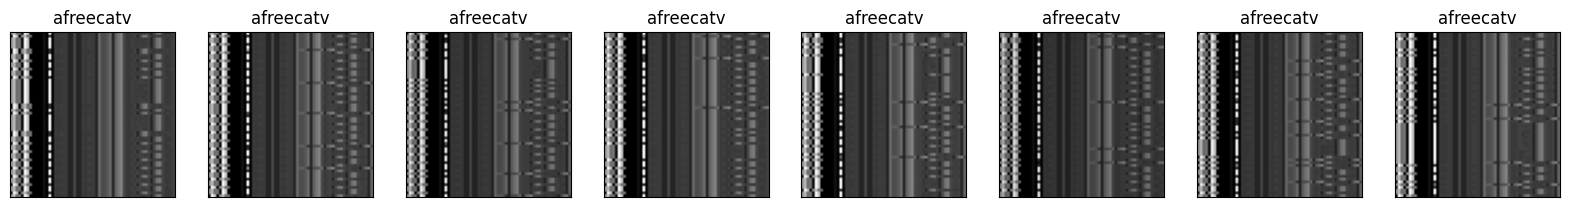

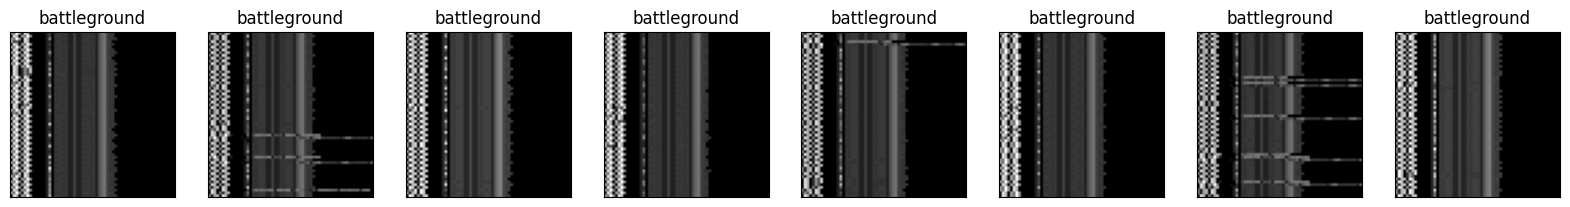

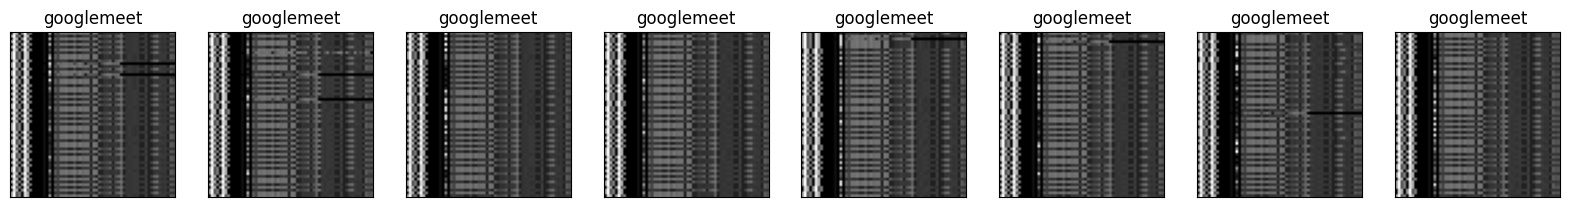

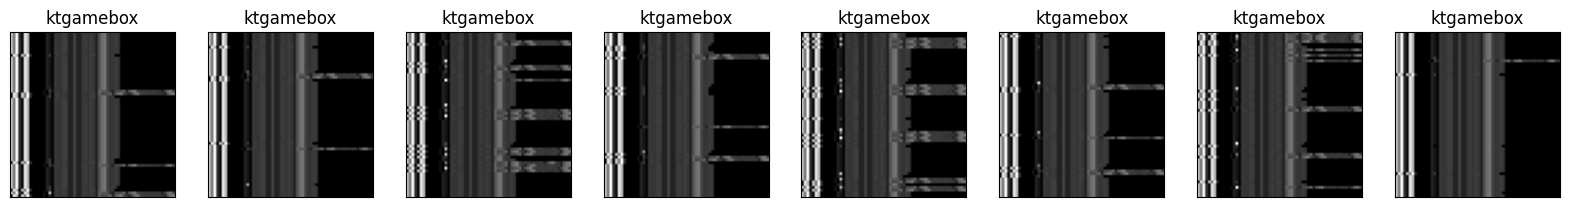

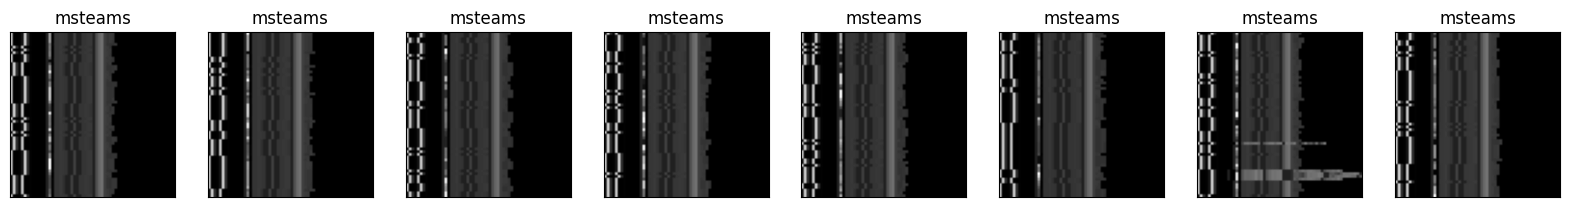

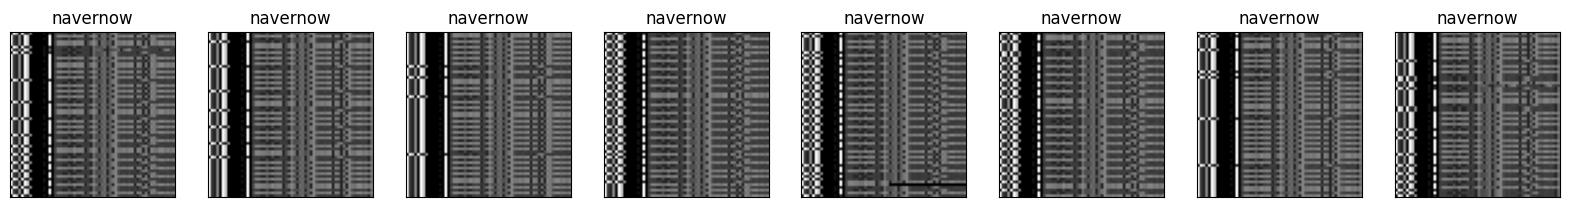

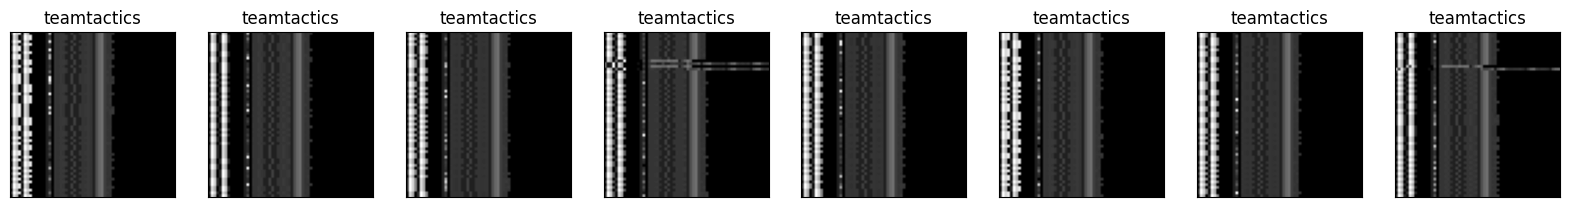

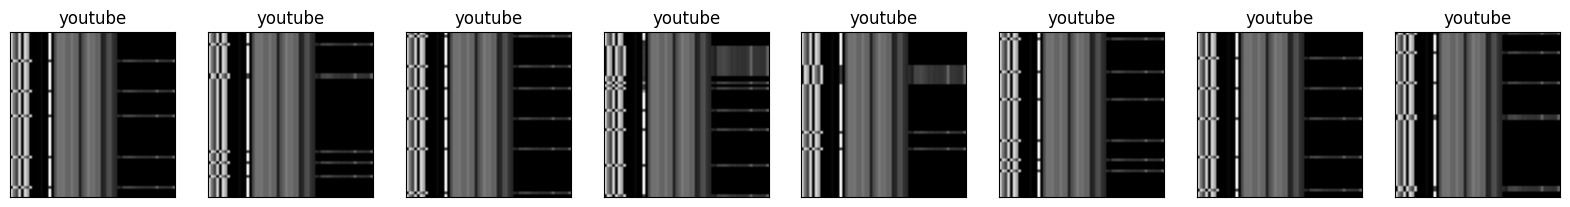

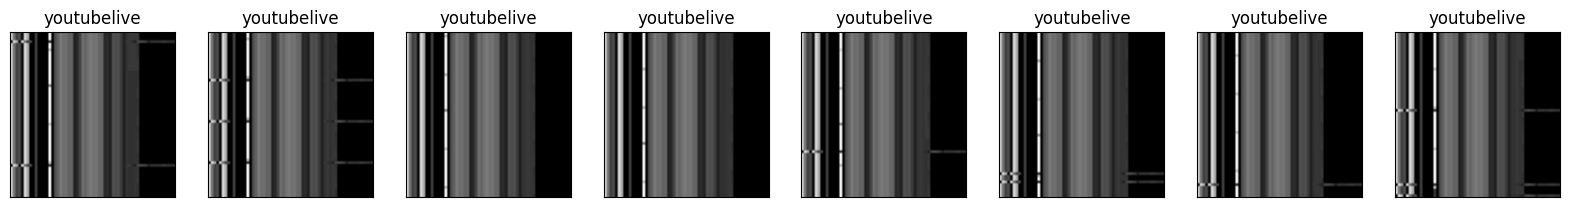

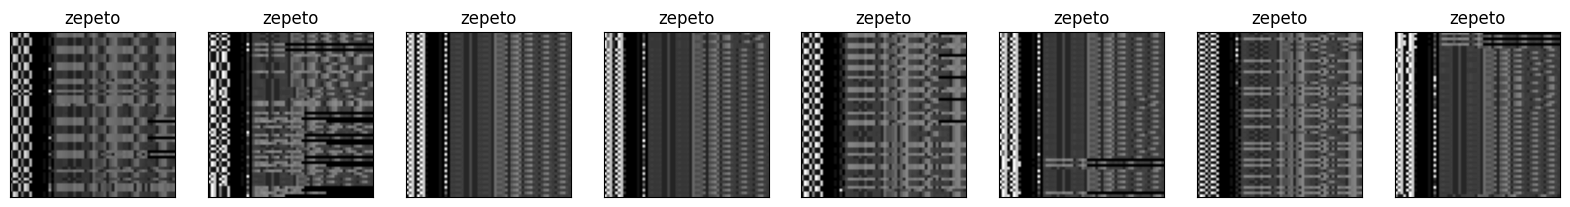

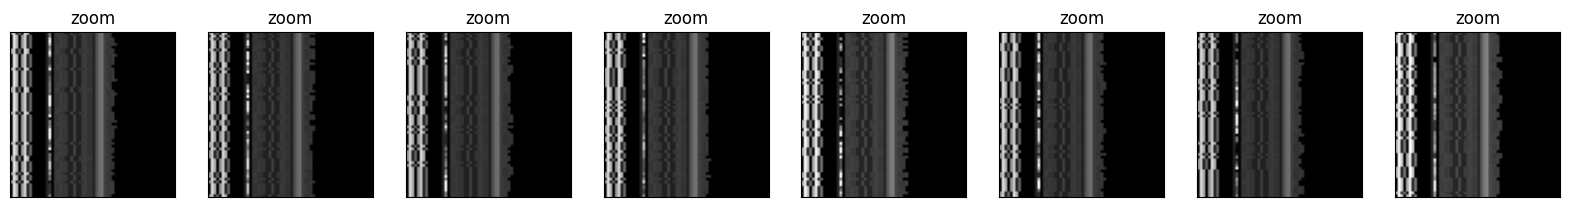

In [22]:
from tqdm import tqdm 

all_images = []
labels_updated = []
with tqdm(total=len(classes)) as pbar: 
    for i in range(len(classes)):
        images, labels = load_images_from_path('./Image_DataSet/' + classes[i], i)
        show_images(images,classes[i])
        all_images.append(images)
        labels_updated.append(labels)
        pbar.update(1)


In [23]:
# Create 1000 packet chunk of each class
chunked_images = []
chunked_labels = []

def divide_1d_array(array,chunk_size):
    return [array[i:i + chunk_size] for i in range(0, len(array), chunk_size)]

for i,image_per_class in enumerate(all_images):
    result_chunk = divide_1d_array(image_per_class, 500)
    result_label = divide_1d_array(labels_updated[i],500)
    for i in range(len(result_label)):
        chunked_images.append(result_chunk[i])
        chunked_labels.append(result_label[i])

In [24]:
training_images = []
training_labels = []  
for i in range(0,140,10):
    for j in range(6):
        training_images.append(chunked_images[i+j])
        training_labels.append(chunked_labels[i+j])

print(len(training_images))

testing_images = [] 
testing_labels = []
for i in range(0,140,10):
    for j in range(6,8):
        testing_images.append(chunked_images[i+j])
        testing_labels.append(chunked_labels[i+j])

validation_images = [] 
validation_labels = []
for i in range(0,140,10):
    for j in range(8,10):
        validation_images.append(chunked_images[i+j])
        validation_labels.append(chunked_labels[i+j])


# len(training_images)
# len(training_images)
# len(training_images)
len(testing_labels)

84


28

In [54]:

X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []
for i in range(len(training_images)):
    for j in range(len(training_images[i])):
        X_train.append(training_images[i][j])
        y_train.append(training_labels[i][j])

for i in range(len(testing_images)):
    for j in range(len(testing_images[i])):
        X_test.append(testing_images[i][j])
        y_test.append(testing_labels[i][j])

for i in range(len(validation_images)):
    for j in range(len(validation_images[i])):
        X_val.append(validation_images[i][j])
        y_val.append(validation_labels[i][j])


In [55]:
import random



# Pair the lists together
combined_test = list(zip(X_test, y_test))
combined_val = list(zip(X_val,y_val))
# Shuffle the combined list
random.shuffle(combined_test)
random.shuffle(combined_val)

# Unzip the shuffled list back into two lists
X_test, y_test = zip(*combined_test)
X_val, y_val = zip(*combined_val)

# Convert back to lists if needed (zip returns tuples)
X_test = list(X_test)
y_test = list(y_test)
X_val = list(X_val)
y_val = list(y_val)

In [27]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [56]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)


In [57]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)



In [59]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, ConvLSTM2D, MaxPooling2D, BatchNormalization, Reshape, LSTM
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomTranslation, RandomZoom, TimeDistributed, Input

model = Sequential()


# CNN part
model.add(Input(shape=(60,60,1)))
model.add(Reshape((60,60)))
model.add(LSTM(60, activation='relu'))
model.add(Reshape((60,1)))
model.add(TimeDistributed(Dense(60, activation='relu')))
model.add(Flatten())
model.add(Dense(14, activation='softmax'))  # Example: 14-class classification

optimizer = Adam(learning_rate=0.001, clipvalue=1.0)  # Clip gradients to 1.0
# # model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# # # # # # Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])




In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 60, 60)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60)                29040     
                                                                 
 reshape_9 (Reshape)         (None, 60, 1)             0         
                                                                 
 time_distributed_4 (TimeDi  (None, 60, 60)            120       
 stributed)                                                      
                                                                 
 flatten_4 (Flatten)         (None, 3600)              0         
                                                                 
 dense_9 (Dense)             (None, 14)                50414     
                                                      

In [61]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
hist = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=25, callbacks=[early_stopping], batch_size=500)

Epoch 1/25


2024-12-03 22:54:30.339379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - ETA: 0s - loss: 1.2133 - accuracy: 0.6907

2024-12-03 22:56:00.429025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


84/84 [==============================] - 94s 1s/step - loss: 1.2133 - accuracy: 0.6907 - val_loss: 0.4319 - val_accuracy: 0.9319
Epoch 2/25
84/84 [==============================] - 92s 1s/step - loss: 0.2110 - accuracy: 0.9672 - val_loss: 0.0936 - val_accuracy: 0.9849
Epoch 3/25
84/84 [==============================] - 92s 1s/step - loss: 0.0774 - accuracy: 0.9853 - val_loss: 0.0514 - val_accuracy: 0.9915
Epoch 4/25
84/84 [==============================] - 97s 1s/step - loss: 0.0252 - accuracy: 0.9938 - val_loss: 0.0316 - val_accuracy: 0.9931
Epoch 5/25
84/84 [==============================] - 105s 1s/step - loss: 0.0987 - accuracy: 0.9775 - val_loss: 0.0505 - val_accuracy: 0.9878
Epoch 6/25
84/84 [==============================] - 105s 1s/step - loss: 0.1345 - accuracy: 0.9826 - val_loss: 0.1065 - val_accuracy: 0.9864
Epoch 7/25
84/84 [==============================] - 111s 1s/step - loss: 0.2291 - accuracy: 0.9529 - val_loss: 0.0801 - val_accuracy: 0.9884


In [44]:
y_pred = model.predict(X_val)

2024-12-03 22:50:54.572379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


438/438 [==============================] - 46s 105ms/step


In [51]:
print(y_val)
print(y_pred)

[ 8  5  4 ...  0 10  4]
[ 8  5  4 ...  0 10  4]


In [49]:
# y_pred = y_pred.argmax(axis = 1)
# y_val = y_val.argmax(axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [52]:
print('accuracy %s' % accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names= classes, labels=range(14)))


accuracy 0.9968571428571429
              precision    recall  f1-score   support

   afreecatv       1.00      0.99      1.00      1000
battleground       1.00      0.99      1.00      1000
     geforce       1.00      1.00      1.00      1000
  googlemeet       0.99      1.00      1.00      1000
   ktgamebox       1.00      1.00      1.00      1000
     msteams       1.00      1.00      1.00      1000
    navernow       1.00      1.00      1.00      1000
     netflix       1.00      0.99      1.00      1000
      roblox       0.99      1.00      1.00      1000
 teamtactics       1.00      0.99      1.00      1000
     youtube       1.00      1.00      1.00      1000
 youtubelive       1.00      1.00      1.00      1000
      zepeto       0.98      0.99      0.99      1000
        zoom       1.00      1.00      1.00      1000

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     1400

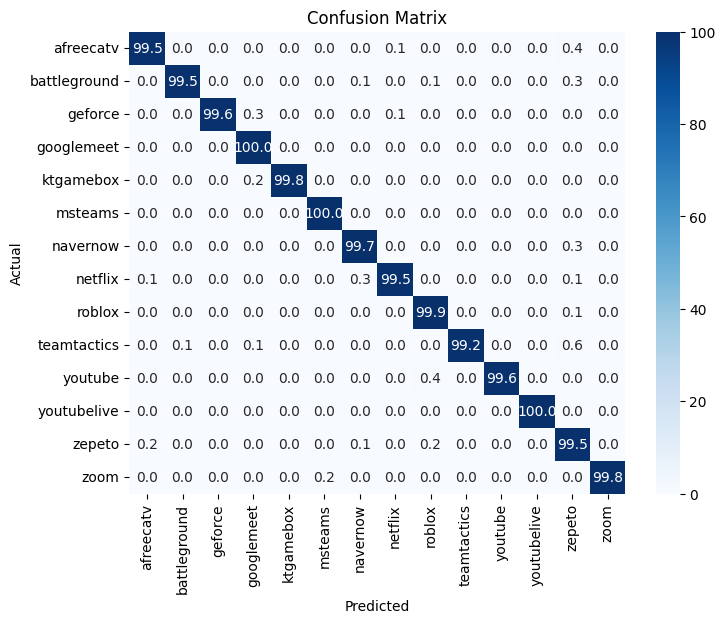

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


val_cm = confusion_matrix(y_val, y_pred, labels=range(14))

# print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}, F1: {val_f1:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}")

cm_normalized = val_cm.astype('float') / val_cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized * 100, annot=True, fmt=".1f", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()